# 01 - Sea Glider 

## Open datafiles and cleaning (QC and despike)

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean.cm as cmo
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import pathlib
from pathlib import Path
import os
import netCDF4
from netCDF4 import Dataset as nc
import glob
from glob import glob
import glidertools as gt
import gsw
import csv
import sys
import array

import warnings
warnings.simplefilter("ignore", UserWarning)
def write_with_byte_inversion(f, tab):
    tab2write = array.array('f', tab.T.flatten())
    if sys.byteorder == 'little':
        tab2write.byteswap()
    f.write(tab2write)

dtype=np.float32

### Load datasets

In [3]:
files = r"C:\Users\lollo\OneDrive - University of Gothenburg\Universitet\Master Thesis\glider_data\p675*.nc"

gt.load.seaglider_show_variables(files)

information is based on file: C:\Users\lollo\OneDrive - University of Gothenburg\Universitet\Master Thesis\glider_data\p6750064.nc


,dims,units,comment
name,,,
gc_data_pts,gc_event,1,
gc_depth,gc_event,meters,
gc_end_secs,gc_event,seconds since 1970-1-1 00:00:00,End of GC time in GMT epoch format
gc_flags,gc_event,,
gc_ob_vertv,gc_event,cm/s,
gc_pitch_ad,gc_event,1,
gc_pitch_ad_start,gc_event,1,
gc_pitch_ctl,gc_event,cm,
gc_pitch_errors,gc_event,1,


 ### Load variables

In [4]:
names = [
    'time',
    'ctd_time', 
    'latitude', 
    'longitude', 
    'ctd_depth', 
    'ctd_pressure',
    'depth',
    'pressure',
    'temperature',
    'temperature_raw',
    'conservative_temperature',
    'salinity', 
    'salinity_raw',
    'absolute_salinity',
    'density_insitu',
    'density',
    'sigma_theta',
    'theta',
    'sigma_t',
    'conductivity',
    'conductivity_raw',
    'north_displacement', 
    'east_displacement',
    'delta_time_s',
    'north_displacement_gsm',
    'east_displacement_gsm',
    'latitude_gsm',
    'longitude_gsm',
    'horz_speed_gsm',
    'horz_speed',
    'vert_speed',
    'vert_speed_gsm',
    'speed',
    'speed_gsm'
]

#'conductivity_raw_qc' , 'salinity_raw_qc', 'temperature_raw_qc' , 'conductivity_qc', 'salinity_qc', 'temperature_qc'

In [5]:
names = list(names)

ds_dict = gt.load.seaglider_basestation_netCDFs(
    files, names,
    return_merged=False,
    keep_global_attrs=False
)


DIMENSION: sg_data_point
{depth, sigma_t, latitude_gsm, ctd_depth, east_displacement_gsm, longitude, speed_gsm, speed, east_displacement, north_displacement, ctd_time, density, delta_time_s, conservative_temperature, pressure, vert_speed, ctd_pressure, longitude_gsm, conductivity_raw, horz_speed, density_insitu, latitude, conductivity, time, temperature, absolute_salinity, vert_speed_gsm, horz_speed_gsm, theta, temperature_raw, salinity_raw, north_displacement_gsm, sigma_theta, salinity}


100%|████████████████████████████████████████████████████████████████████████████████| 127/127 [00:10<00:00, 11.92it/s]


{'latitude_gsm', 'sigma_t', 'east_displacement_gsm', 'longitude', 'speed', 'east_displacement', 'north_displacement', 'density', 'delta_time_s', 'conservative_temperature', 'vert_speed', 'longitude_gsm', 'horz_speed', 'density_insitu', 'latitude', 'conductivity', 'temperature', 'absolute_salinity', 'theta', 'north_displacement_gsm', 'sigma_theta', 'salinity'} not in p6750001.nc
{'delta_time_s'} not in p6750084.nc
{'delta_time_s'} not in p6750085.nc
{'delta_time_s'} not in p6750086.nc
{'delta_time_s'} not in p6750087.nc
{'delta_time_s'} not in p6750088.nc
{'delta_time_s'} not in p6750089.nc
{'delta_time_s'} not in p6750090.nc



In [6]:
print(ds_dict)

{'sg_data_point': <xarray.Dataset>
Dimensions:                   (sg_data_point: 422669)
Coordinates:
    ctd_depth                 (sg_data_point) float64 0.3879 0.451 ... -0.2057
    longitude                 (sg_data_point) float64 nan nan ... 13.85 13.85
    latitude                  (sg_data_point) float64 nan nan ... -35.4 -35.4
    ctd_time_dt64             (sg_data_point) datetime64[ns] 2025-09-17T10:20...
Dimensions without coordinates: sg_data_point
Data variables: (12/33)
    time_dt64                 (sg_data_point) datetime64[ns] 2025-09-17T10:20...
    depth                     (sg_data_point) float64 0.9094 0.9793 ... -0.07994
    speed_gsm                 (sg_data_point) float64 1.612 1.039 ... 52.33
    ctd_time                  (sg_data_point) float64 1.758e+09 ... 1.76e+09
    pressure                  (sg_data_point) float64 0.9159 0.9864 ... -0.08052
    ctd_pressure              (sg_data_point) float64 0.3911 0.4546 ... -0.2071
    ...                        ...
 

In [7]:
ds = ds_dict['sg_data_point']


# Here we drop the time variables imported for the PAR variable
# we don't need these anymore. You might have to change this
# depening on the dataset

# if 'time' in ds:
#     ds = ds.drop(["time", "time_dt64"])


# To make it easier and clearer to work with, we rename the
# original variables to something that makes more sense. This
# is done with the xarray.Dataset.rename({}) function.
# We only use the merged dataset as this contains all the
# imported dimensions.
# NOTE: The renaming has to be specific to the dataset otherwise an error will occur
# ds = ds.rename({
#     'ctd_pressure': 'pressure',
#     'ctd_depth': 'depth',
#     'ctd_time_dt64': 'time',
#     'ctd_time': 'time_raw',
# })

# print(ds)

In [145]:
ds

<xarray.Dataset>
Dimensions:                   (sg_data_point: 422669)
Coordinates:
    ctd_depth                 (sg_data_point) float64 0.3879 0.451 ... -0.2057
    longitude                 (sg_data_point) float64 ...
    latitude                  (sg_data_point) float64 ...
    ctd_time_dt64             (sg_data_point) datetime64[ns] ...
Dimensions without coordinates: sg_data_point
Data variables: (12/33)
    time_dt64                 (sg_data_point) datetime64[ns] ...
    depth                     (sg_data_point) float64 ...
    speed_gsm                 (sg_data_point) float64 ...
    ctd_time                  (sg_data_point) datetime64[ns] ...
    pressure                  (sg_data_point) float64 ...
    ctd_pressure              (sg_data_point) float64 ...
    ...                        ...
    temperature               (sg_data_point) float64 nan nan ... 17.89 17.89
    absolute_salinity         (sg_data_point) float64 ...
    theta                     (sg_data_point) float64 ...
    north_displacement_gsm    (sg_data_point) float64 ...
    sigma_theta               (sg_data_point) float64 ...
    salinity                  (sg_data_point) float64 nan nan nan ... nan nan
Attributes:
    date_created:             2025-10-20 14:26:06
    number_of_dives:          128.0
    files:                    ['C:\\Users\\lollo\\OneDrive - University of Go...
    time_coverage_start:      2025-09-17 10:20:17
    time_coverage_end:        2025-10-13 10:53:44
    geospatial_vertical_min:  -0.2958712021631342
    geospatial_vertical_max:  993.9760316575006
    geospatial_lat_min:       -35.49119608233423
    geospatial_lat_max:       -33.341316666666664
    geospatial_lon_min:       11.073439521461031
    geospatial_lon_max:       13.845082465738725
    processing:               [2025-10-20 14:26:06] imported data with Glider...

In [9]:
for base in ["temperature", "salinity", "conductivity"]:
    if base in ds:
        f_raw = float(ds[base].isnull().mean())
        print(f"{base:14s}  NaN raw={f_raw:.1%}")

temperature     NaN raw=0.0%
salinity        NaN raw=1.5%
conductivity    NaN raw=1.5%


#### Good to know:

We get "half-dives" for every dive, for example, dive 26 will be divided:

26 ≈ descent/downcast

26.5 ≈ ascent/upcast

### Save datasets as one nc-file

In [35]:
ds.to_netcdf('01_ds.nc')

## Orginial data - Overview

In [92]:
ds = xr.open_dataset(r"Data\01_ds.nc")

In [93]:
x = np.array(ds.dives)  # ensures these are arrays
y = np.array(ds.ctd_depth)

C:\Users\lollo\miniconda3\envs\master\Lib\site-packages\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)
C:\Users\lollo\miniconda3\envs\master\Lib\site-packages\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)
C:\Users\lollo\miniconda3\envs\master\Lib\site-packages\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version o

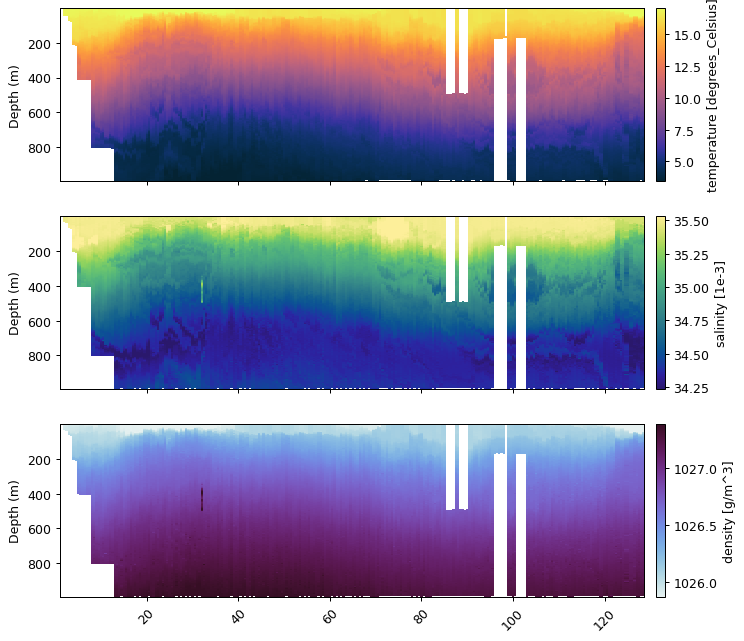

In [94]:
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, ds.temperature, cmap=cmo.thermal, ax=ax[0])
gt.plot(x, y, ds.salinity, cmap=cmo.haline, ax=ax[1])
gt.plot(x, y, ds.density, cmap=cmo.dense, ax=ax[2])

[a.set_xlabel('') for a in ax]

#ax[0].cb.set_label('Original Data')
#ax[1].cb.set_label('Cleaned Data')
#ax[2].cb.set_label('Difference from Original')

plt.show()

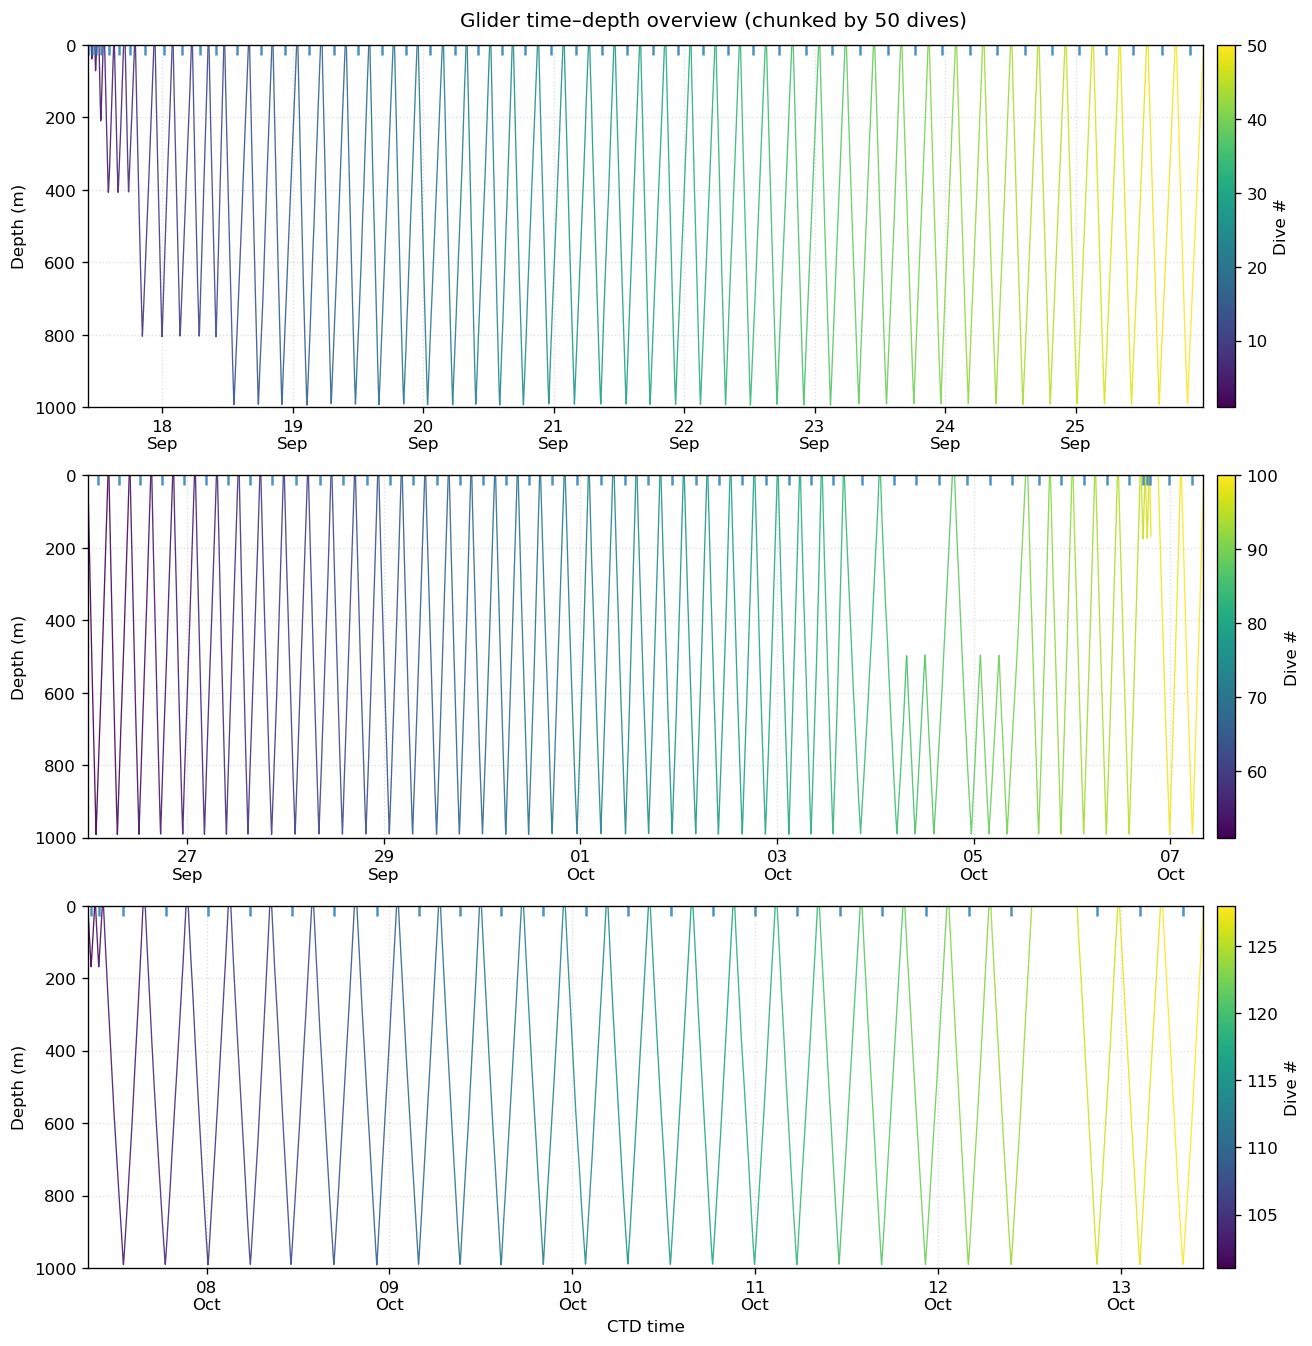

In [100]:
t  = np.asarray(ds.ctd_time_dt64.values)     # datetime64[ns]
z  = np.asarray(ds.ctd_depth.values, float)
dv = np.asarray(ds.dives.values)

# sortera på tid
idx = np.argsort(t)
t, z, dv = t[idx], z[idx], dv[idx]

# heltals-dyknummer (.0=ned, .5=upp)
dnum = np.floor(dv).astype(int)
uniq = np.unique(dnum)

# dela upp i block om 50 dyk
chunk = 50
blocks = [uniq[i:i+chunk] for i in range(0, len(uniq), chunk)]

fig, axes = plt.subplots(len(blocks), 1, figsize=(12, 3.8*len(blocks)), dpi=120)

if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

cmap = plt.cm.viridis

for ax, block in zip(axes, blocks):
    sel = np.isin(dnum, block)
    tB, zB, dB = t[sel], z[sel], dnum[sel]

    # färgnorm per panel
    norm = plt.Normalize(block.min(), block.max())

    # rita profiler (en färg per dyk)
    for d in block:
        m = (dB == d)
        ax.plot(tB[m], zB[m], lw=0.8, color=cmap(norm(d)), alpha=0.9)

    # auto-zoom i tid och djup
    ax.set_xlim(np.nanmin(tB), np.nanmax(tB))
    zbot = float(np.nanmax(zB))
    ax.set_ylim(np.ceil(zbot/50)*50, 0)  # 0 m högst upp

    # snygga axlar
    ax.grid(True, ls=":", alpha=0.4)
    ax.set_ylabel("Depth (m)")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

    # färgbar för dyknummer
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap); sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, pad=0.01)
    cbar.set_label("Dive #")

    # ---- diskreta markörer vid dyken (mid-tid)
    t_ns = tB.astype('datetime64[ns]').astype('int64')
    mids, dlist = [], []
    for d in block:
        m = (dB == d)
        if np.any(m):
            mids.append(np.nanmedian(t_ns[m]))
            dlist.append(d)
    if mids:
        t_mid = np.array(mids, dtype='int64').astype('datetime64[ns]')
        ax.plot(t_mid, np.full_like(t_mid, 0, dtype=float),  # placera markören upptill
                marker='|', ls='none', ms=12, mew=1.5, color='tab:blue', alpha=0.8)

axes[-1].set_xlabel("CTD time")
fig.suptitle("Glider time–depth overview (chunked by 50 dives)", y=0.98)
fig.tight_layout()
plt.show()


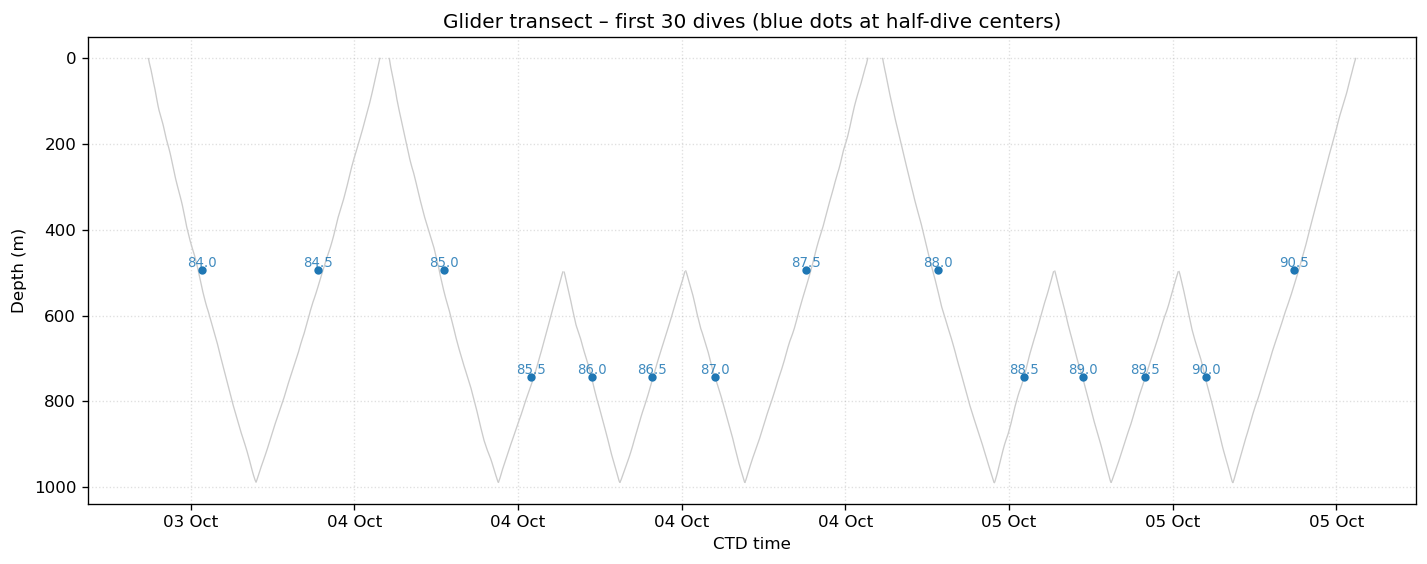

In [146]:
t  = np.asarray(ds.ctd_time_dt64.values)     # datetime64[ns]
z  = np.asarray(ds.ctd_depth.values, float)
dv = np.asarray(ds.dives.values)             # e.g., 1.0, 1.5, 2.0, 2.5 ...

# --- keep only the first 30 FULL dives (1..30, both halves)
#full = np.floor(dv).astype(int)
#keep = full <= 20

dmin, dmax = 84, 90  # ändra här
full = np.floor(dv).astype(int)
keep = (full >= dmin) & (full <= dmax)

t, z, dv = t[keep], z[keep], dv[keep]

# --- sort by time for clean profiles
idx = np.argsort(t)
t, z, dv = t[idx], z[idx], dv[idx]

# --- unique half-dives in this subset (1.0, 1.5, 2.0, 2.5, ...)
hdives = np.unique(dv[np.isfinite(dv)])

fig, ax = plt.subplots(figsize=(12, 4.8), dpi=120)

# background V-profiles
for hd in hdives:
    m = (dv == hd)
    if np.count_nonzero(m) > 1:
        ax.plot(t[m], z[m], color='0.8', lw=0.8, alpha=1)

# blue dots at the middle of each half-dive
t_mid_list, z_mid_list, labels = [], [], []
for hd in hdives:
    m = (dv == hd)
    if np.any(m):
        # median time
        t_ns = t[m].astype('datetime64[ns]').astype('int64')
        t_mid = np.nanmedian(t_ns).astype('int64').astype('datetime64[ns]')
        # depth halfway between min and max of that half-dive
        z_half = z[m]
        z_mid = 0.5 * (np.nanmin(z_half) + np.nanmax(z_half))

        t_mid_list.append(t_mid)
        z_mid_list.append(z_mid)
        labels.append(hd)

t_mid = np.array(t_mid_list, dtype='datetime64[ns]')
z_mid = np.array(z_mid_list, float)

ax.plot(t_mid, z_mid, 'o', ms=4, color='tab:blue', label='half-dive centers')

# (optional) annotate every 4th dot with the half-dive number
for i in range(0, len(labels), 1):
    ax.text(t_mid[i], z_mid[i], f'{labels[i]:.1f}', color='tab:blue',
            fontsize=8, va='bottom', ha='center', alpha=0.85)

# axes styling
ax.set_ylabel('Depth (m)')
ax.set_xlabel('CTD time')
ax.invert_yaxis()
ax.grid(True, ls=':', alpha=0.4)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
plt.title('Glider transect – first 30 dives (blue dots at half-dive centers)')
plt.tight_layout()
plt.show()

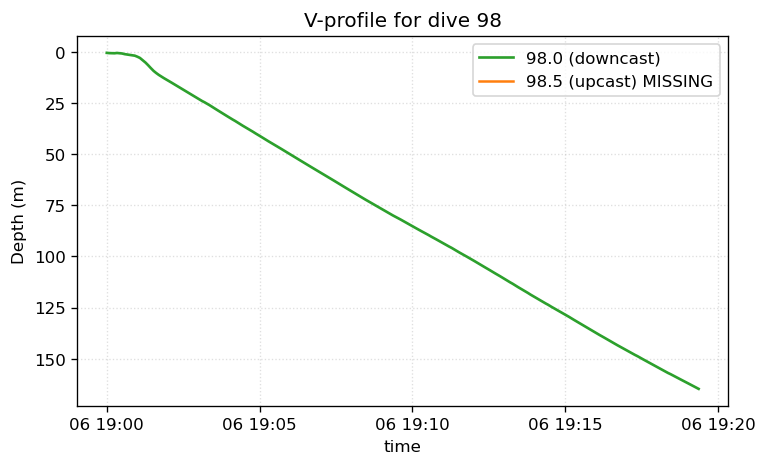

In [102]:
def plot_vprofile(dn, ds):
    t  = np.asarray(ds.ctd_time_dt64.values)  # datetime64[ns]
    z  = np.asarray(ds.ctd_depth.values, float)
    dv = np.asarray(ds.dives.values)

    fig, ax = plt.subplots(figsize=(7,4), dpi=120)
    ok_any = False

    for half, label, color in [(0.0, "downcast", "tab:green"),
                               (0.5, "upcast",   "tab:orange")]:
        m = np.isfinite(dv) & (np.abs(dv - (dn + half)) < 1e-6)
        if np.count_nonzero(m) > 1:
            ax.plot(t[m], z[m], '-', color=color, lw=1.6, label=f"{dn+half:.1f} ({label})")
            ok_any = True
        else:
            ax.plot([], [], color=color, label=f"{dn+half:.1f} ({label}) MISSING")

    ax.invert_yaxis()
    ax.grid(True, ls=':', alpha=0.4)
    ax.set_xlabel("time")
    ax.set_ylabel("Depth (m)")
    ax.set_title(f"V-profile for dive {dn}")
    ax.legend()
    plt.show()

    if not ok_any:
        print(f"Inga punkter för dyk {dn} (varken 0.0 eller 0.5).")

# Exempel: titta på dyk 98
plot_vprofile(98, ds)

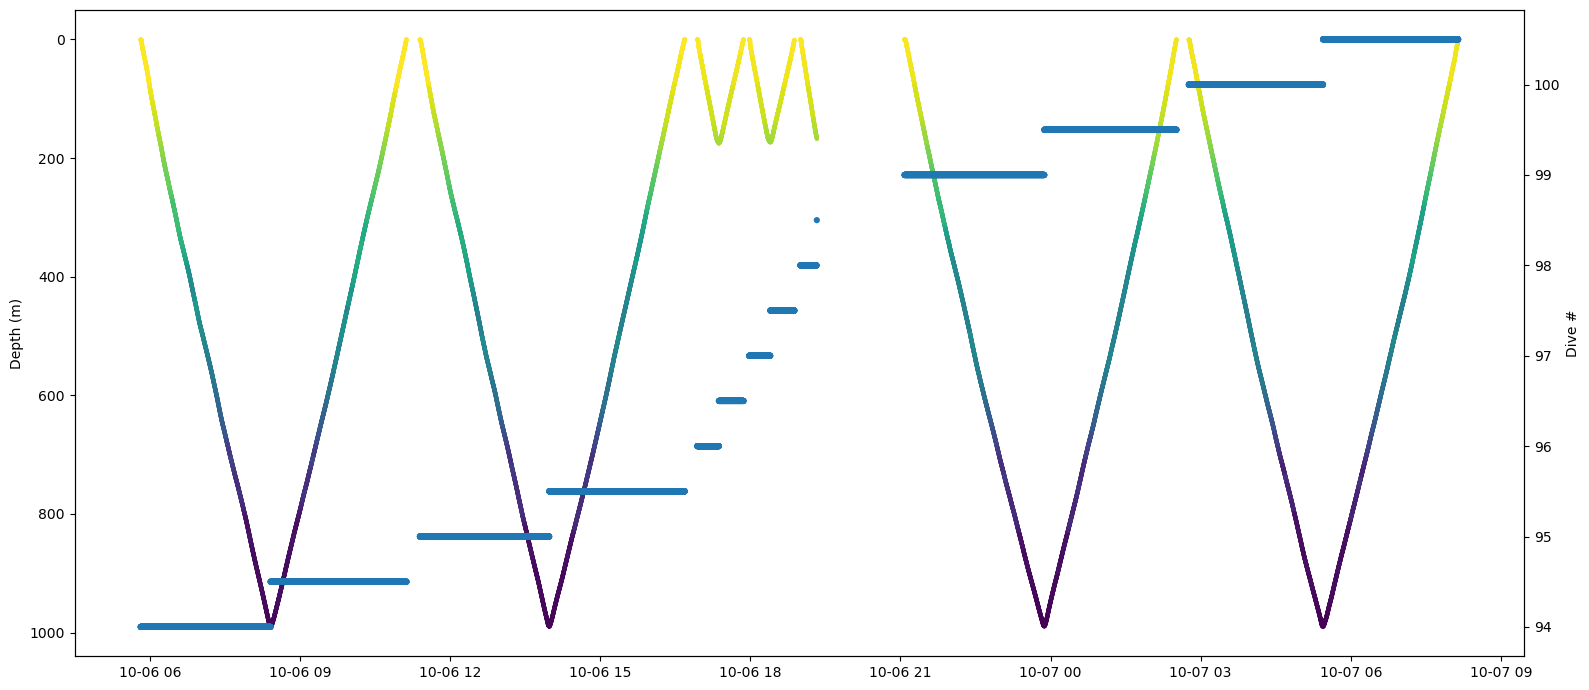

In [103]:
# välj t.ex. dyk 95–100 (både .0 och .5)
mask = (np.floor(ds.dives) >= 94) & (np.floor(ds.dives) <= 100)
sub = ds.where(mask, drop=True)

fig, ax = plt.subplots(figsize=(16, 7))
ax2 = ax.twinx()

# Matplotlib-variant (robust mot xarray-plot-strul)
ax.scatter(sub["ctd_time_dt64"], sub["ctd_depth"],
           c=sub["temperature"], s=10, edgecolor="none")
ax.invert_yaxis()
ax.set_ylabel("Depth (m)")

ax2.scatter(sub["ctd_time_dt64"], sub["dives"],
            s=20, color="tab:blue", edgecolor="none")
ax2.set_ylabel("Dive #")

plt.tight_layout(); plt.show()


## Clean data - Glidertools Quality Control (QC)
### Wrapper functions: https://glidertools.readthedocs.io/en/latest/quality_control.html

Steps done inside calc_physics:
1) Global outlier removal (IQR):
    - iqr=2.5 → remove values outside [Q1 - 2.5*IQR, Q3 + 2.5*IQR] over the whole dataset.
    - Lower number = stricter; higher = looser.

2) Despiking along dives (vertical/time direction):
    - spike_window=5 → rolling window size for baseline.
    - spike_method='median' → compare to rolling median; flag/replace spikes.

3) Optional horizontal (cross-dive) masking:
    - mask_frac=0.2 → if >20% of points in a dive look anomalous (vs neighbors on same depth after internal gridding),
      mask the whole dive column (appears as a thin white vertical band). Increase/omit to be less aggressive.

4) Smoothing:
    - savitzky_golay_window=11, savitzky_golay_order=2 → Savitzky–Golay filter; larger window = smoother,
      higher order = more flexible fit (risk of overfitting if too high).

Output:
A cleaned/smoothed field with the same shape as the input (NaNs where data were removed).


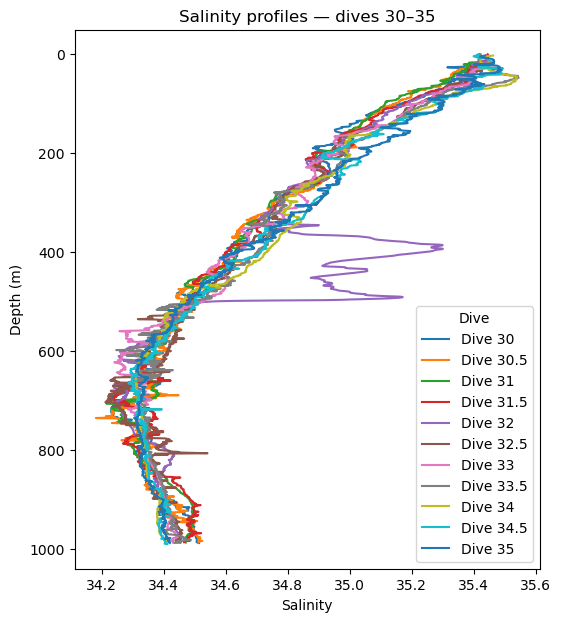

In [95]:
fig, ax = plt.subplots(figsize=(6,7))

ds_sel = ds.where((ds['dives']>=30) & (ds['dives']<=35), drop=True)

for d, g in ds_sel.groupby('dives'):
    g = g.sortby('ctd_depth')  # snyggare profiler
    ax.plot(g['salinity'], g['ctd_depth'], label=f'Dive {float(d):g}')

ax.invert_yaxis()
ax.set_xlabel('Salinity')
ax.set_ylabel('Depth (m)')
ax.set_title('Salinity profiles — dives 30–35')
ax.legend(title="Dive")
plt.show()

In [96]:
# 0) Gör en målmask för spiken (justera intervall)
bad = ((ds['dives'] == 32) &
       (ds['ctd_depth'] >= 330) & (ds['ctd_depth'] <= 510))

# 1) Maskera spiken på rådata
sal_spike_masked  = ds.salinity.where(~bad)

temp_qc = gt.calc_physics(ds.temperature, x, y, iqr=2.5, spike_window=5, 
                          spike_method='median', mask_frac=0.3,
                          savitzky_golay_window=11, savitzky_golay_order=2)

salt_qc = gt.calc_physics(sal_spike_masked, x, y, iqr=2.5, spike_window=5, 
                          spike_method='median', mask_frac=1, 
                          savitzky_golay_window=11, savitzky_golay_order=2)


Physics Variable:
	Removing outliers with IQR * 2.5: 0 obs
	Removing spikes with rolling median (spike window=5)


C:\Users\lollo\miniconda3\envs\master\Lib\site-packages\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)
C:\Users\lollo\miniconda3\envs\master\Lib\site-packages\glidertools\cleaning.py:155: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  median = gridded.rolling(3, axis=1, center=True, min_periods=2).median()


	Removing horizontal outliers (fraction=0.3, multiplier=2.5)
	Smoothing with Savitzky-Golay filter (window=11, order=2)

Physics Variable:
	Removing outliers with IQR * 2.5: 0 obs
	Removing spikes with rolling median (spike window=5)


C:\Users\lollo\miniconda3\envs\master\Lib\site-packages\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)
C:\Users\lollo\miniconda3\envs\master\Lib\site-packages\glidertools\cleaning.py:155: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  median = gridded.rolling(3, axis=1, center=True, min_periods=2).median()


	Removing horizontal outliers (fraction=1, multiplier=2.5)
	Smoothing with Savitzky-Golay filter (window=11, order=2)


C:\Users\lollo\miniconda3\envs\master\Lib\site-packages\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)
C:\Users\lollo\miniconda3\envs\master\Lib\site-packages\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)
C:\Users\lollo\miniconda3\envs\master\Lib\site-packages\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version o

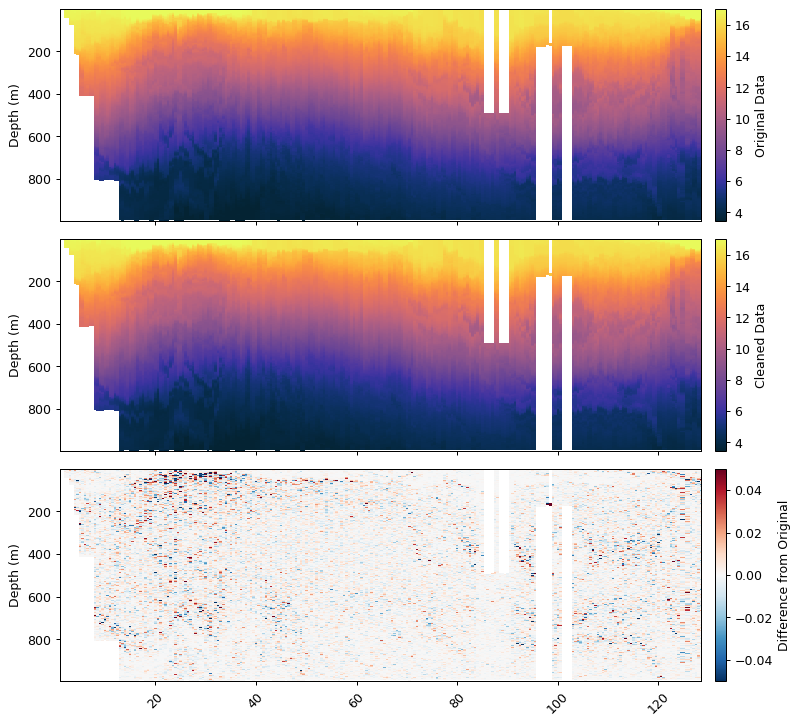

In [97]:
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)

gt.plot(x, y, ds.temperature, cmap=cmo.thermal, ax=ax[0])
gt.plot(x, y, temp_qc, cmap=cmo.thermal, ax=ax[1])
gt.plot(x, y, temp_qc - ds.temperature, cmap=plt.cm.RdBu_r, vmin=-0.05, vmax=0.05, ax=ax[2])

[a.set_xlabel('') for a in ax]
ax[1].set_title("")

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

#plt.savefig('temp_qc.png', bbox_inches='tight', dpi=100)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\lollo\miniconda3\envs\master\Lib\site-packages\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)
C:\Users\lollo\miniconda3\envs\master\Lib\site-packages\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)
C:\Users\lollo\miniconda3\envs\master\Lib\site-packages\glidertools\mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version o

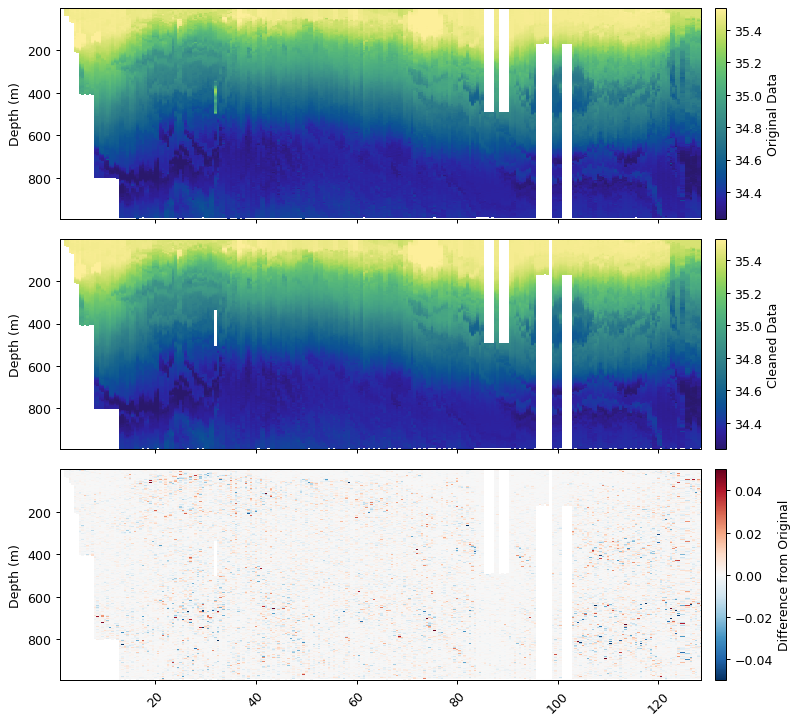

In [98]:
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)

gt.plot(x, y, ds.salinity, cmap=cmo.haline, ax=ax[0])
gt.plot(x, y, salt_qc, cmap=cmo.haline, ax=ax[1])
gt.plot(x, y, salt_qc - ds.salinity, cmap=plt.cm.RdBu_r, vmin=-0.05, vmax=0.05, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

#plt.savefig('salt_qc.png', bbox_inches='tight', dpi=100)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

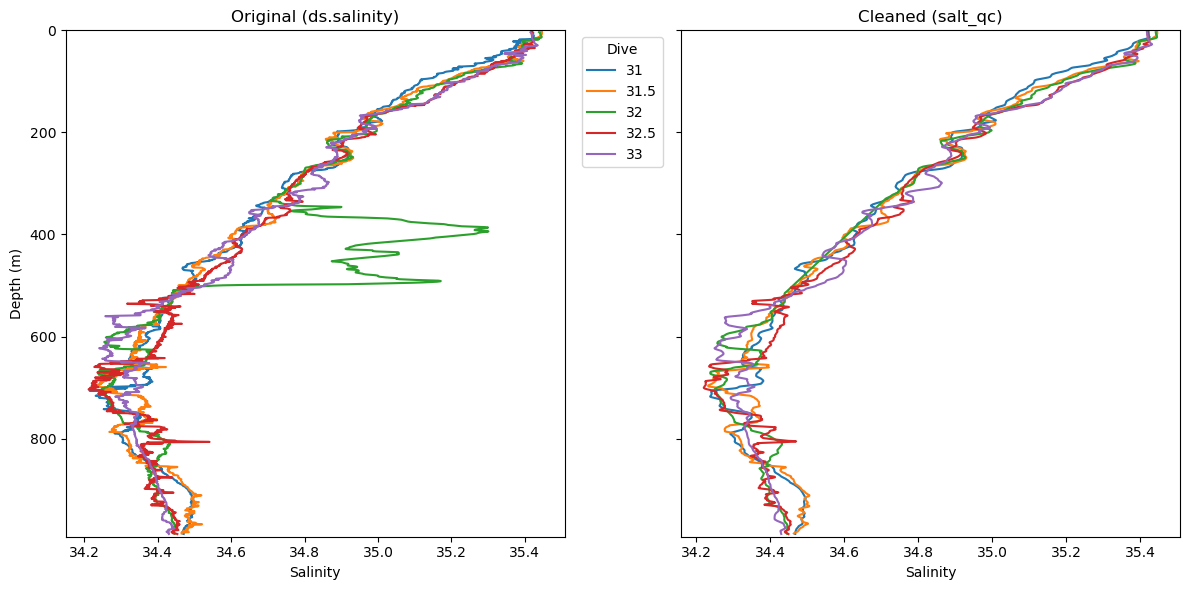

In [99]:
# 2) sida-vid-sida: vänster original, höger rensad (dyk 30–35)
sel = (ds['dives'] >= 31) & (ds['dives'] <= 33)
ds_sel   = ds.where(sel, drop=True)
salt_sel = salt_qc.where(sel, drop=True)

dives_unique = np.unique(ds_sel['dives'].values)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
cmap = {d: colors[i % len(colors)] for i, d in enumerate(dives_unique)}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# --- Vänster: ORIGINAL ---
for d in dives_unique:
    mask = (ds_sel['dives'].values == d)
    z = ds_sel['ctd_depth'].values[mask]
    s = ds_sel['salinity'].values[mask]
    m = np.isfinite(z) & np.isfinite(s)
    order = np.argsort(z[m])
    ax1.plot(s[m][order], z[m][order], color=cmap[d], label=f'{float(d):g}')

#ax1.invert_yaxis()
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Depth (m)')
ax1.set_title('Original (ds.salinity)')
ax1.legend(title='Dive', bbox_to_anchor=(1.02, 1), loc='upper left')

# --- Höger: RENSAD ---
for d in dives_unique:
    mask = (ds_sel['dives'].values == d)   # samma mask
    z = ds_sel['ctd_depth'].values[mask]
    s = salt_sel.values[mask]              # OBS: från salt_qc
    m = np.isfinite(z) & np.isfinite(s)
    order = np.argsort(z[m])
    ax2.plot(s[m][order], z[m][order], color=cmap[d], label=f'{float(d):g}')

#ax2.invert_yaxis()
ax2.set_xlabel('Salinity')
ax2.set_title('Cleaned (salt_qc)')

z_all = ds_sel['ctd_depth'].values
zmin = np.nanmin(z_all)
zmax = np.nanmax(z_all)

# Sätt gränser: max överst, min nederst -> ger 0 överst och stort djup nederst
ax1.set_ylim(zmax, zmin)
ax2.set_ylim(zmax, zmin)

plt.tight_layout()
plt.show()


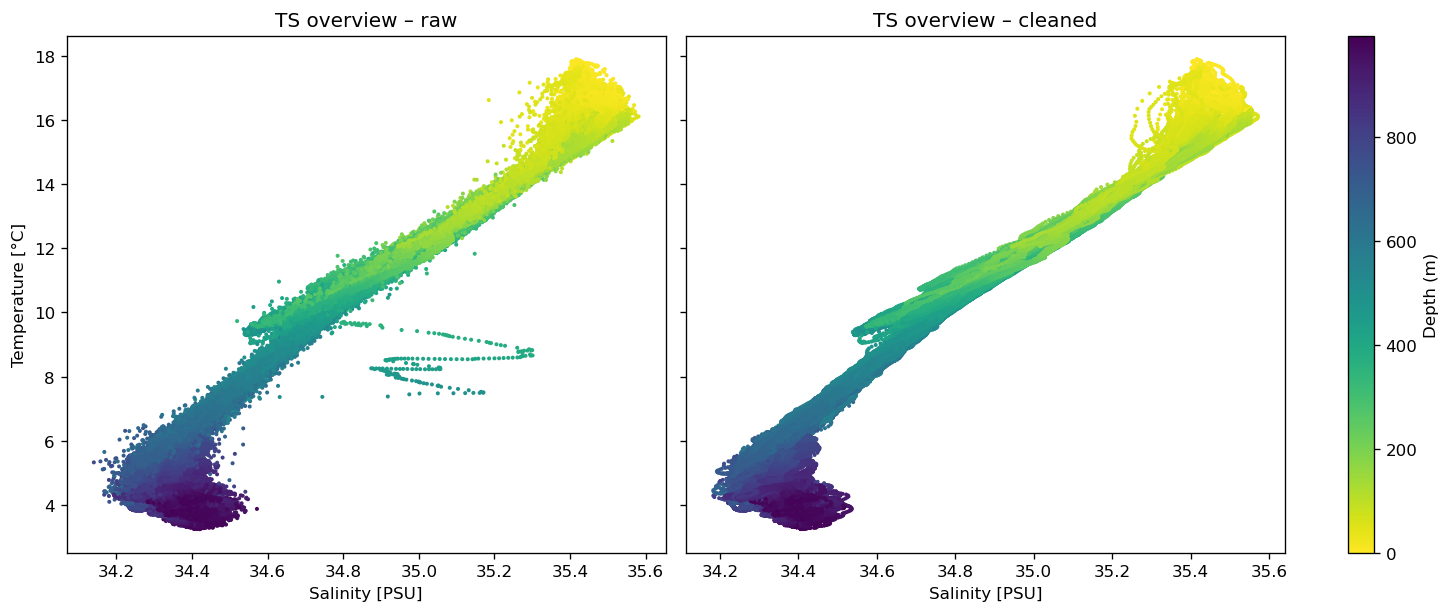

In [100]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=120, sharey=True, constrained_layout=True)

T = ds.temperature
S = ds.salinity
Z = ds.ctd_depth

vmin, vmax = np.nanmin(Z), np.nanmax(Z)
norm = plt.Normalize(vmin, vmax)
cmap = plt.cm.viridis_r  # mörkt = djupt

sc0 = axs[0].scatter(S, T, c=Z, s=2, cmap=cmap, norm=norm, rasterized=True)
sc1 = axs[1].scatter(salt_qc, temp_qc, c=Z, s=2, cmap=cmap, norm=norm, rasterized=True)

axs[0].set_title("TS overview – raw")
axs[1].set_title("TS overview – cleaned")
for ax in axs:
    ax.invert_yaxis()
    ax.set_xlabel("Salinity [PSU]")
axs[0].set_ylabel("Temperature [°C]")

cbar = fig.colorbar(sc1, ax=axs, location="right")
cbar.set_label("Depth (m)")

#plt.savefig('TS_qc.png', bbox_inches='tight', dpi=100)
plt.show()

In [101]:
# overall NaN share
f_t_raw = float(ds.temperature.isnull().mean())
f_s_raw = float(ds.salinity.isnull().mean())
f_t_qc  = float(temp_qc.isnull().mean())
f_s_qc  = float(salt_qc.isnull().mean())

print(f"temperature   NaN raw={f_t_raw:.1%}   NaN qc={f_t_qc:.1%}")
print(f"salinity      NaN raw={f_s_raw:.1%}   NaN qc={f_s_qc:.1%}")

temperature   NaN raw=0.0%   NaN qc=0.0%
salinity      NaN raw=1.5%   NaN qc=1.6%


In [102]:
# andel NaN per dyk
nan_frac = salt_qc.isnull().groupby(ds['dives']).mean('sg_data_point')

# dyk som är helt bortmaskade (100% NaN)
all_nan_dives = nan_frac.where(nan_frac == 1.0, drop=True)

print("Andel NaN per dyk:\n", nan_frac.to_series().round(3))
print("\nDyk som är HELT NaN:", list(all_nan_dives['dives'].values))

Andel NaN per dyk:
 dives
1.0      1.000
1.5      1.000
2.0      0.592
2.5      0.272
3.0      0.366
         ...  
126.5    0.010
127.0    0.015
127.5    0.008
128.0    0.016
128.5    0.010
Name: salinity_processed, Length: 254, dtype: float64

Dyk som är HELT NaN: [1.0, 1.5, 98.5]


In [103]:
# andel NaN per dyk
nan_frac_temp = temp_qc.isnull().groupby(ds['dives']).mean('sg_data_point')

# dyk som är helt bortmaskade (100% NaN)
all_nan_dives = nan_frac_temp.where(nan_frac_temp == 1.0, drop=True)

print("Andel NaN per dyk:\n", nan_frac_temp.to_series().round(3))
print("\nDyk som är HELT NaN:", list(all_nan_dives['dives'].values))

Andel NaN per dyk:
 dives
1.0      1.000
1.5      1.000
2.0      0.066
2.5      0.000
3.0      0.000
         ...  
126.5    0.000
127.0    0.000
127.5    0.000
128.0    0.000
128.5    0.000
Name: temperature_processed, Length: 254, dtype: float64

Dyk som är HELT NaN: [1.0, 1.5]


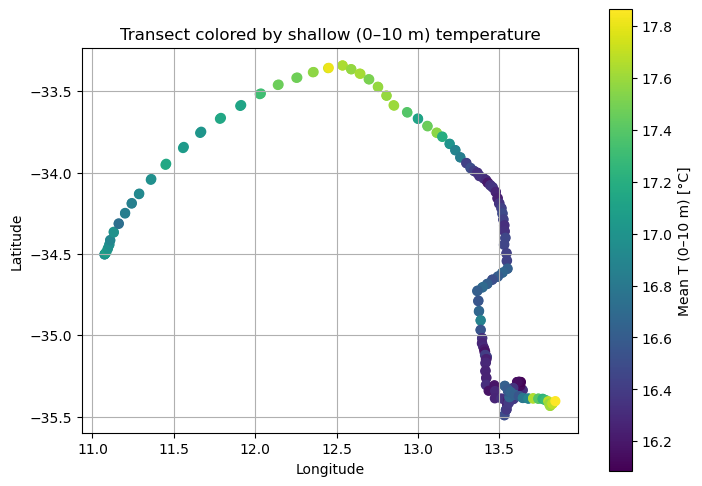

In [104]:
shallow = ds.ctd_depth <= 10

# 3) Beräkna per-halvd yk (dives innehåller t.ex. 26 och 26.5)
#    - medeltemp i 0–10 m
#    - representativ lon/lat (medel av ytpunkterna)
T10 = ds.temperature.where(shallow).groupby(ds.dives).mean()
lon10 = ds.longitude.where(shallow).groupby(ds.dives).mean()
lat10 = ds.latitude.where(shallow).groupby(ds.dives).mean()

# 4) Plotta transektpunkter färgade av T(0–10 m)
plt.figure(figsize=(8,6))
sc = plt.scatter(lon10, lat10, c=T10, cmap="viridis", s=40)
cb = plt.colorbar(sc, label="Mean T (0–10 m) [°C]")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Transect colored by shallow (0–10 m) temperature")
plt.grid(True)
try:
    plt.gca().set_aspect('equal', adjustable='box')  # snyggare geometri om området är litet
except Exception:
    pass
plt.show()

### Add cleaned variables to dataset

In [105]:
ds["temp_qc"] = temp_qc
ds["temp_qc"].attrs.update({
    "long_name": "temperature cleaned (calc_physics)",
    "units": "degC"})

ds["salt_qc"] = salt_qc
ds["salt_qc"].attrs.update({
    "long_name": "salinity cleaned (calc_physics)",
    "units": "PSU"})

# ds["CT_qc"] = CT_qc
# ds["temp_qc"].attrs.update({
#     "long_name": "conservative temperature cleaned (calc_physics)",
#     "units": "degC"})

# ds["SA_qc"] = SA_qc
# ds["SA_qc"].attrs.update({
#     "long_name": "absolute salinity cleaned (calc_physics)",
#     "units": "g/kg"})

In [107]:
ds

<xarray.Dataset>
Dimensions:                   (sg_data_point: 422669)
Coordinates:
    ctd_depth                 (sg_data_point) float64 0.3879 0.451 ... -0.2057
    longitude                 (sg_data_point) float64 ...
    latitude                  (sg_data_point) float64 ...
    ctd_time_dt64             (sg_data_point) datetime64[ns] ...
Dimensions without coordinates: sg_data_point
Data variables: (12/35)
    time_dt64                 (sg_data_point) datetime64[ns] ...
    depth                     (sg_data_point) float64 ...
    speed_gsm                 (sg_data_point) float64 ...
    ctd_time                  (sg_data_point) datetime64[ns] ...
    pressure                  (sg_data_point) float64 ...
    ctd_pressure              (sg_data_point) float64 ...
    ...                        ...
    theta                     (sg_data_point) float64 ...
    north_displacement_gsm    (sg_data_point) float64 ...
    sigma_theta               (sg_data_point) float64 ...
    salinity                  (sg_data_point) float64 nan nan nan ... nan nan
    temp_qc                   (sg_data_point) float64 nan nan ... 17.89 17.89
    salt_qc                   (sg_data_point) float64 nan nan nan ... nan nan
Attributes:
    date_created:             2025-10-20 14:26:06
    number_of_dives:          128.0
    files:                    ['C:\\Users\\lollo\\OneDrive - University of Go...
    time_coverage_start:      2025-09-17 10:20:17
    time_coverage_end:        2025-10-13 10:53:44
    geospatial_vertical_min:  -0.2958712021631342
    geospatial_vertical_max:  993.9760316575006
    geospatial_lat_min:       -35.49119608233423
    geospatial_lat_max:       -33.341316666666664
    geospatial_lon_min:       11.073439521461031
    geospatial_lon_max:       13.845082465738725
    processing:               [2025-10-20 14:26:06] imported data with Glider...

## Save dataset with qc-variables

#### Note: Number 01 corresponds to which notebook they are made in

In [108]:
ds.to_netcdf('01_ds_qc.nc')

#### Save instead as a cleaned dataset

In [138]:
# --- 1) Bygg nytt dataset direkt från DataArrays (ingen .values/.dims behövs) ---
# ds_clean = xr.Dataset(
#     data_vars=dict(
#         temperature_qc=temp_qc,   # behåller dims/attrs från temp_qc
#         salinity_qc=salt_qc,
#         ctd_pressure=ds.ctd_pressure, 
#     ),
#     coords=dict(
#         time=ds.ctd_time_dt64,
#         ctd_depth=ds.ctd_depth,   # aux-koordinat
#         latitude=ds.latitude,
#         longitude=ds.longitude,
#         dives=ds.dives,           # aux-koordinat för groupby

#     ),
#     attrs=dict(
#         title="Seaglider cleaned core variables",
#         source="derived from ds",
#         history="2025-10-21: created clean dataset from QC’ed variables",
#         description="Cleaned variables with same dims/coords as ds_work"
#     ),
# )

# print(ds_clean)